In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyDyn, CartPoleDynamicGaussianNoisyObs, CartPoleDynamicGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from LinearController_ import LinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

In [3]:
# Task 3.5

In [4]:
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs

target0 = CartPole(False)
target1 = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target2 = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target3 = CartPoleDynamicGaussianNoisyDyn(False, loc=0, factor=0.1)

model_3_5 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_3_5.load_model("./models/3_5__13__8")
model_3_4 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_3_4.load_model("./models/3_4__13__8")
model_3_3 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_3_3.load_model("./models/3_3__13__8")
model_2_2 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_2_2.load_model("./models/2_2__13__8")

Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.]')

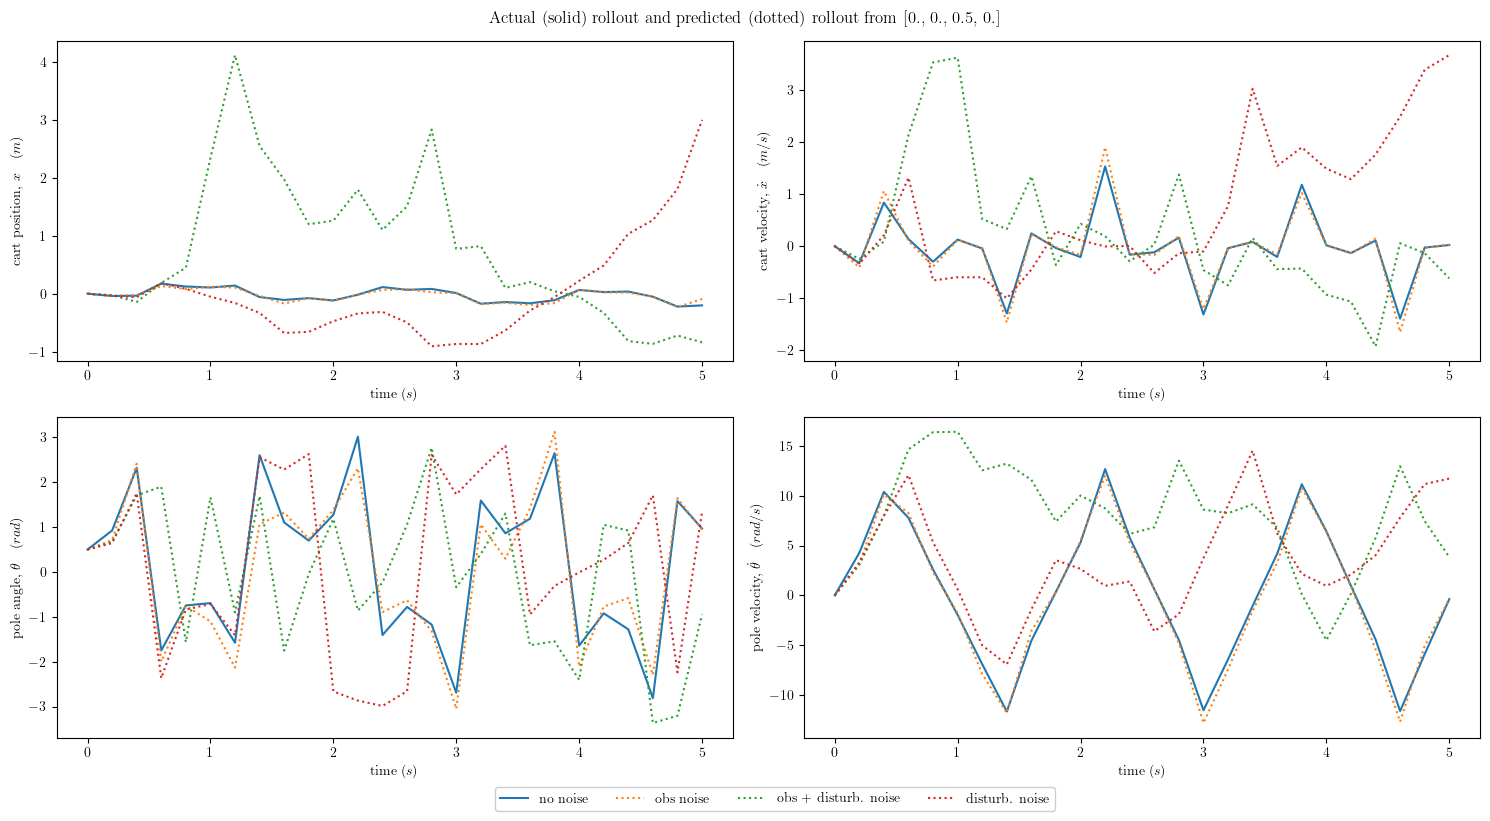

In [5]:
from shared import plot_rollout_single, plot_rollout

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(2, 2, figsize=(15, 8), layout='tight')

s0 = np.array([0, 0, 0.5, 0, 0])

x, y0 = target0.simulate(time=5, state=s0, remap=True)

y = np.zeros((4, x.size, 4))
y[0] = y0

_, y1 = target1.simulate(time=5, state=s0, remap=True)
_, y2 = target2.simulate(time=5, state=s0, remap=True)
_, y3 = target3.simulate(time=5, state=s0, remap=True)

y[1] = y1
y[2] = y2
y[3] = y3



plot_rollout(x, y[0], ax, fig, linestyle='solid', label='no noise')
plot_rollout(x, y[1], ax, fig, linestyle='dotted', label='obs noise')
plot_rollout(x, y[2], ax, fig, linestyle='dotted', label='obs + disturb. noise')
plot_rollout(x, y[3], ax, fig, linestyle='dotted', label='disturb. noise')

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.]")


Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.] under different noise conditions')

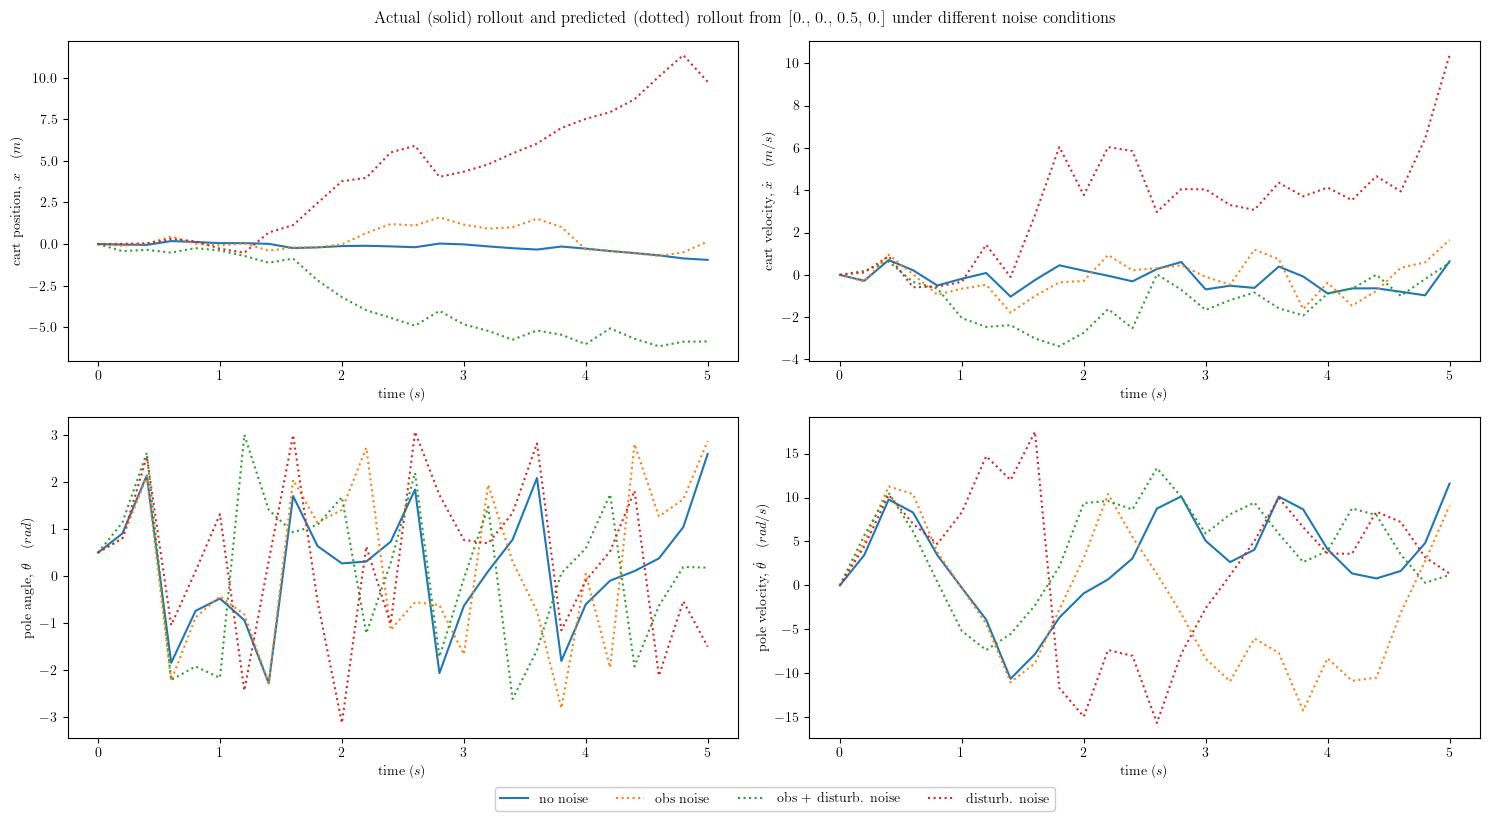

In [6]:
from shared import plot_rollout_single, plot_rollout

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(2, 2, figsize=(15, 8), layout='tight')

s0 = np.array([0, 0, 0.5, 0, 0])

x, y0 = model_2_2.simulate(time=5, state=s0, remap=True)

yh = np.zeros((4, x.size, 4))
yh[0] = y0

_, y1 = model_3_3.simulate(time=5, state=s0, remap=True)
_, y2 = model_3_4.simulate(time=5, state=s0, remap=True)
_, y3 = model_3_5.simulate(time=5, state=s0, remap=True)

yh[1] = y1
yh[2] = y2
yh[3] = y3



plot_rollout(x, yh[0], ax, fig, linestyle='solid', label='no noise')
plot_rollout(x, yh[1], ax, fig, linestyle='dotted', label='obs noise')
plot_rollout(x, yh[2], ax, fig, linestyle='dotted', label='obs + disturb. noise')
plot_rollout(x, yh[3], ax, fig, linestyle='dotted', label='disturb. noise')

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.] under different noise conditions")


Text(0.5, 0.98, 'Actual (top) and predicted (bottom) roll-out from [0., 0., 0.5, 0.] under different noise conditions')

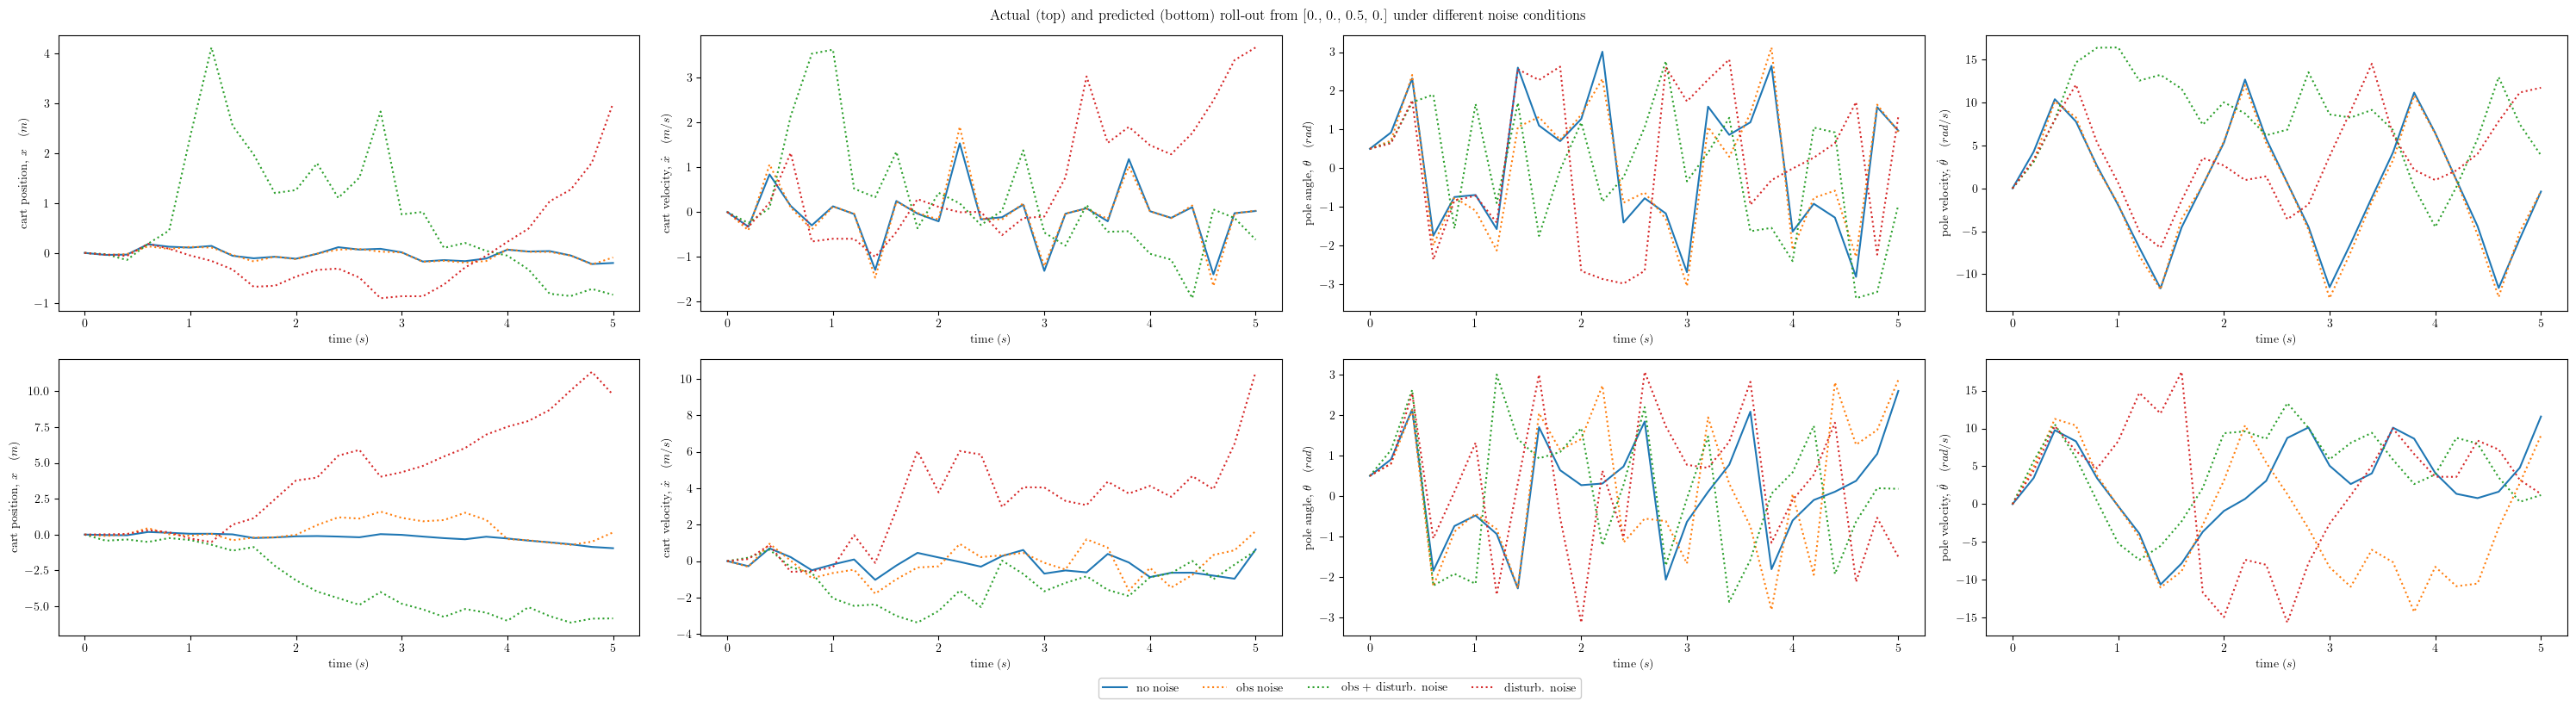

In [7]:
from shared import plot_rollout_merge

fig, ax_merge = plt.subplots(2, 4, figsize=(30, 8), layout='tight')


plot_rollout_merge(x, y[0], ax_merge[0], fig, linestyle='solid', label='no noise')
plot_rollout_merge(x, y[1], ax_merge[0], fig, linestyle='dotted', label='obs noise')
plot_rollout_merge(x, y[2], ax_merge[0], fig, linestyle='dotted', label='obs + disturb. noise')
plot_rollout_merge(x, y[3], ax_merge[0], fig, linestyle='dotted', label='disturb. noise')

plot_rollout_merge(x, yh[0], ax_merge[1], fig, linestyle='solid', )
plot_rollout_merge(x, yh[1], ax_merge[1], fig, linestyle='dotted', )
plot_rollout_merge(x, yh[2], ax_merge[1], fig, linestyle='dotted', )
plot_rollout_merge(x, yh[3], ax_merge[1], fig, linestyle='dotted', )


lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=4)
fig.suptitle("Actual (top) and predicted (bottom) roll-out from [0., 0., 0.5, 0.] under different noise conditions")


In [22]:
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObsDyn

t0 = CartPole(False)
t1 = CartPoleDynamicGaussianNoisyObs(False, loc=0.5, factor=0.1)
t2 = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0.5, factor=0.1)
t3 = CartPoleDynamicGaussianNoisyDyn(False, loc=0.5, factor=0.1)

m0 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)

m1 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)

m2 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)

m3 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)

m0.load_model("./models/2_2__13__8")
m1.load_model("./models/3_3__13__8_05")
m2.load_model("./models/3_4__13__8_05")
m3.load_model("./models/3_5__13__8_05")



Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.]')

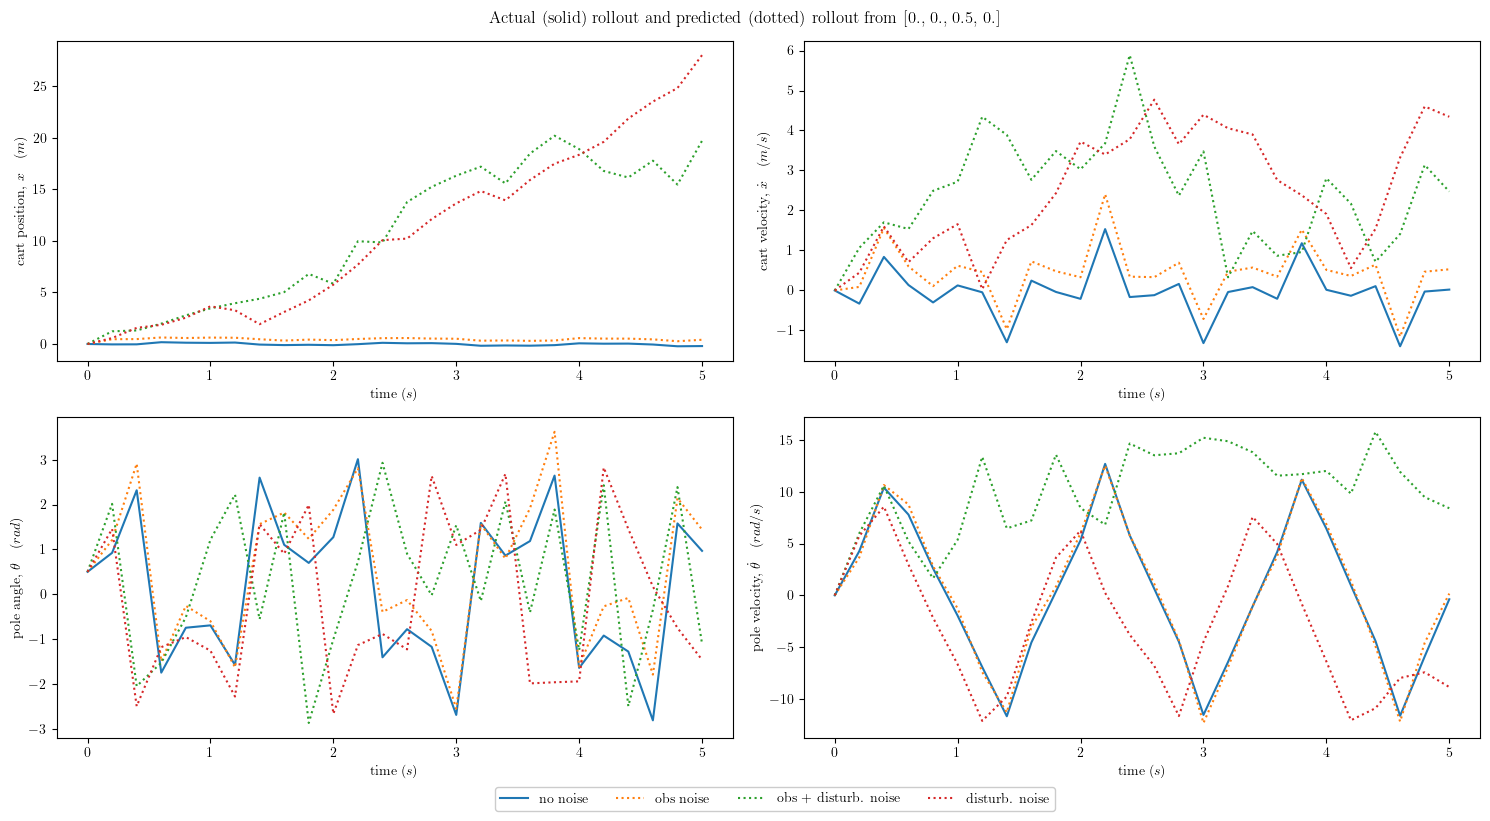

In [23]:
from shared import plot_rollout_single, plot_rollout

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(2, 2, figsize=(15, 8), layout='tight')

s0 = np.array([0, 0, 0.5, 0, 0])

x, y0 = t0.simulate(time=5, state=s0, remap=True)

y = np.zeros((4, x.size, 4))
y[0] = y0

_, y1 = t1.simulate(time=5, state=s0, remap=True)
_, y2 = t2.simulate(time=5, state=s0, remap=True)
_, y3 = t3.simulate(time=5, state=s0, remap=True)

y[1] = y1
y[2] = y2
y[3] = y3



plot_rollout(x, y[0], ax, fig, linestyle='solid', label='no noise')
plot_rollout(x, y[1], ax, fig, linestyle='dotted', label='obs noise')
plot_rollout(x, y[2], ax, fig, linestyle='dotted', label='obs + disturb. noise')
plot_rollout(x, y[3], ax, fig, linestyle='dotted', label='disturb. noise')

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.]")


Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.] under different noise conditions')

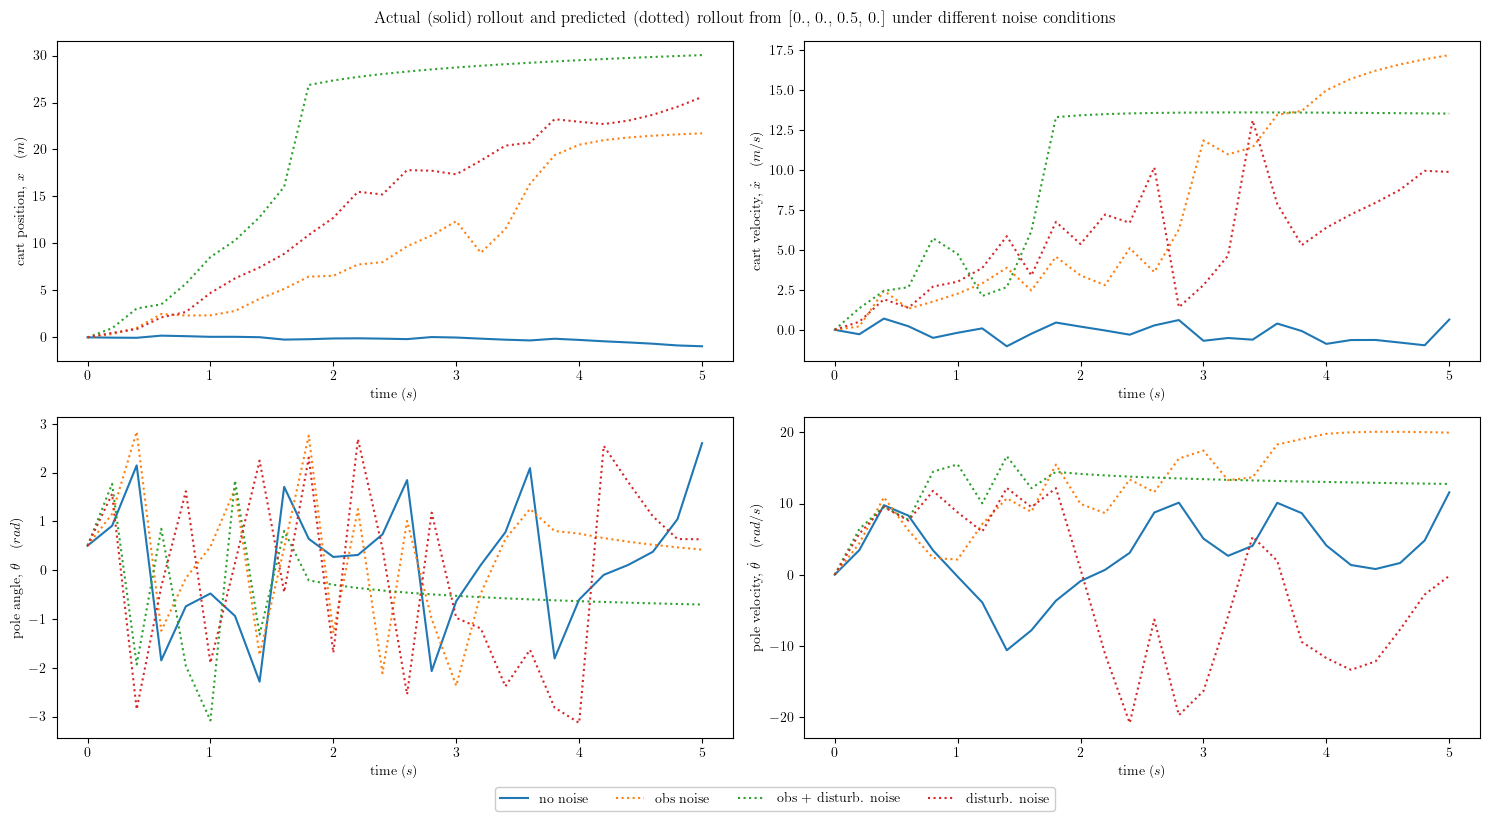

In [24]:
from shared import plot_rollout_single, plot_rollout

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(2, 2, figsize=(15, 8), layout='tight')

s0 = np.array([0, 0, 0.5, 0, 0])

x, y0 = m0.simulate(time=5, state=s0, remap=True)

yh = np.zeros((4, x.size, 4))
yh[0] = y0

_, y1 = m1.simulate(time=5, state=s0, remap=True)
_, y2 = m2.simulate(time=5, state=s0, remap=True)
_, y3 = m3.simulate(time=5, state=s0, remap=True)

yh[1] = y1
yh[2] = y2
yh[3] = y3



plot_rollout(x, yh[0], ax, fig, linestyle='solid', label='no noise')
plot_rollout(x, yh[1], ax, fig, linestyle='dotted', label='obs noise')
plot_rollout(x, yh[2], ax, fig, linestyle='dotted', label='obs + disturb. noise')
plot_rollout(x, yh[3], ax, fig, linestyle='dotted', label='disturb. noise')

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.] under different noise conditions")


Text(0.5, 0.98, 'Actual (top) and predicted (bottom) roll-out from [0., 0., 0.5, 0.] under different noise conditions')

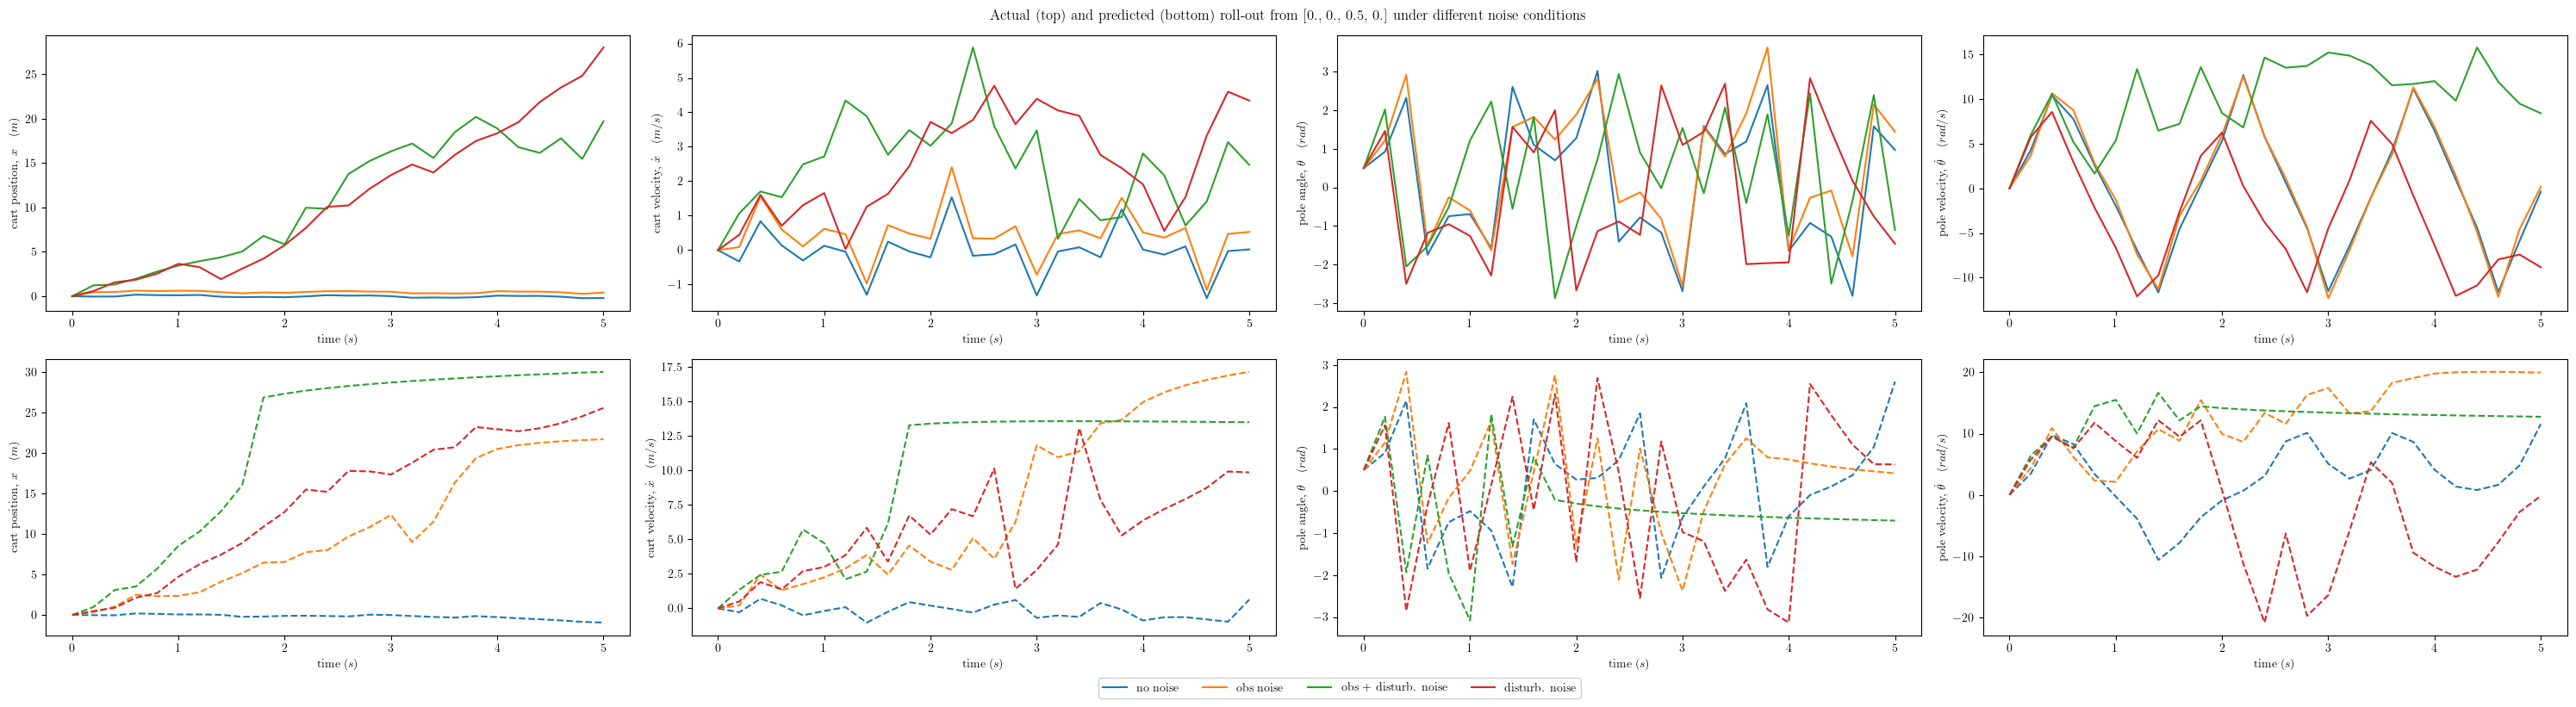

In [25]:
from shared import plot_rollout_merge

fig, ax_merge = plt.subplots(2, 4, figsize=(30, 8), layout='tight')


plot_rollout_merge(x, y[0], ax_merge[0], fig, linestyle='solid', label='no noise')
plot_rollout_merge(x, y[1], ax_merge[0], fig, linestyle='solid', label='obs noise')
plot_rollout_merge(x, y[2], ax_merge[0], fig, linestyle='solid', label='obs + disturb. noise')
plot_rollout_merge(x, y[3], ax_merge[0], fig, linestyle='solid', label='disturb. noise')

plot_rollout_merge(x, yh[0], ax_merge[1], fig, linestyle='dashed', )
plot_rollout_merge(x, yh[1], ax_merge[1], fig, linestyle='dashed', )
plot_rollout_merge(x, yh[2], ax_merge[1], fig, linestyle='dashed', )
plot_rollout_merge(x, yh[3], ax_merge[1], fig, linestyle='dashed', )


lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=4)
fig.suptitle("Actual (top) and predicted (bottom) roll-out from [0., 0., 0.5, 0.] under different noise conditions")


/Users/chongzhenyuen/miniforge3/envs/dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/Users/chongzhenyuen/miniforge3/envs/dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.]')

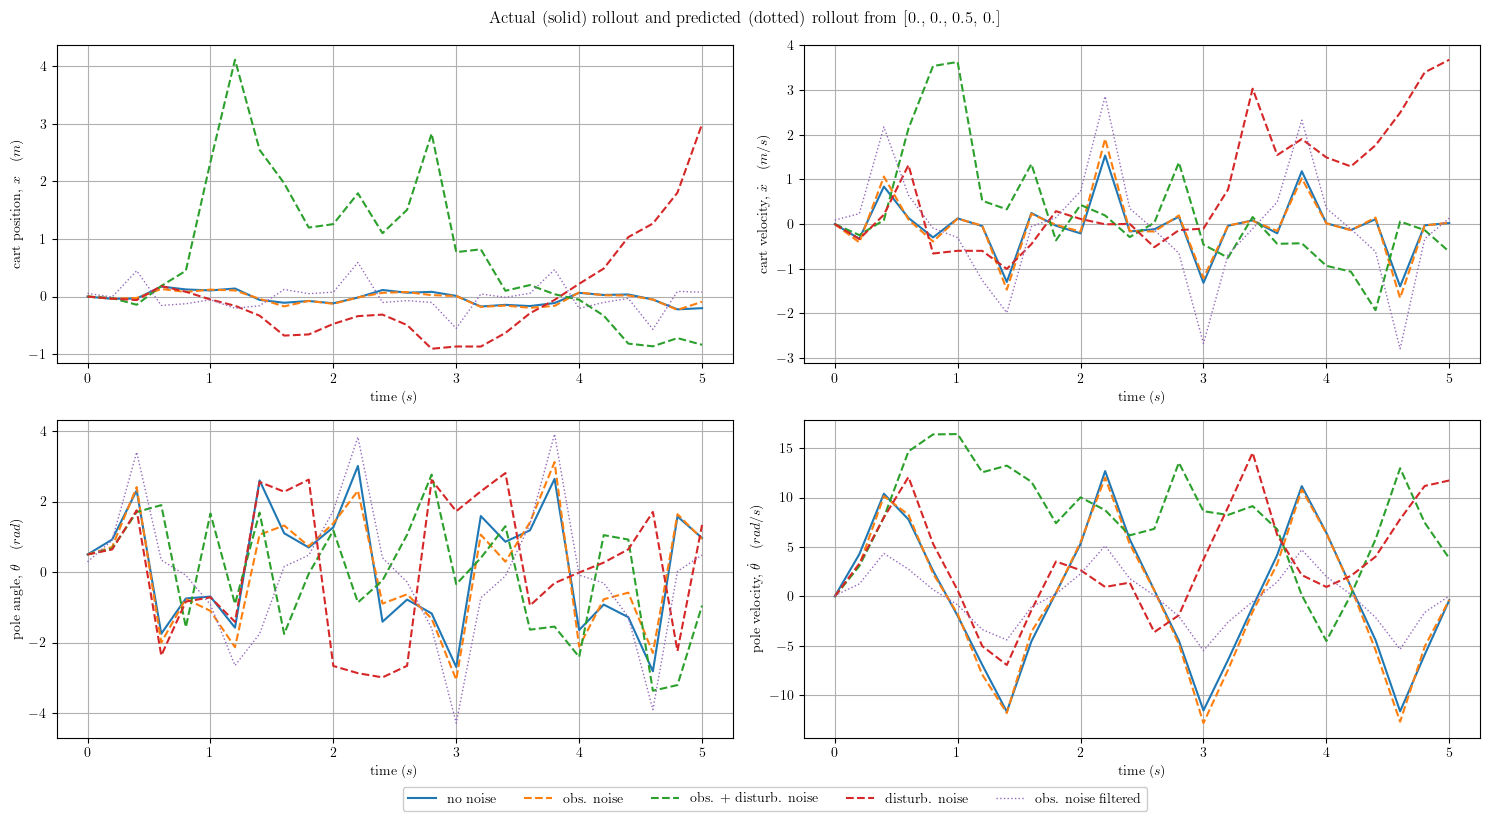

In [12]:
from scipy.signal import wiener
import matplotlib.pyplot as plt
import numpy as np
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs, CartPoleDynamicGaussianNoisyDyn, CartPoleDynamicGaussianNoisyObsDyn

target0 = CartPole(False)
target1 = CartPoleDynamicGaussianNoisyObs(False, loc=0, factor=0.1)
target2 = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target3 = CartPoleDynamicGaussianNoisyDyn(False, loc=0, factor=0.1)

model_3_5 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_3_5.load_model("./models/3_5__13__8")
model_3_4 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_3_4.load_model("./models/3_4__13__8")
model_3_3 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_3_3.load_model("./models/3_3__13__8")
model_2_2 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_2_2.load_model("./models/2_2__13__8")


n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(2, 2, figsize=(15, 8), layout='tight')

s0 = np.array([0, 0, 0.5, 0, 0])

x, y0 = target0.simulate(time=5, state=s0, remap=True)

yt = np.zeros((7, x.size, 4))
yt[0] = y0

_
_, y1 = target1.simulate(time=5, state=s0, remap=True)
_, y2 = target2.simulate(time=5, state=s0, remap=True)
_, y3 = target3.simulate(time=5, state=s0, remap=True)

yt[1] = y1
yt[2] = y2
yt[3] = y3

eye = np.eye(4)
filter_mat = wiener(eye, 3)
yt[4] = yt[1] @ filter_mat
yt[6] = yt[2] @ filter_mat
yt[5] = yt[3] @ filter_mat

plot_rollout(x, yt[0], ax, fig, linestyle='solid', label='no noise')
plot_rollout(x, yt[1], ax, fig, linestyle='dashed', label='obs. noise')
plot_rollout(x, yt[2], ax, fig, linestyle='dashed', label='obs. + disturb. noise')
plot_rollout(x, yt[3], ax, fig, linestyle='dashed', label='disturb. noise')
plot_rollout(x, yt[4], ax, fig, linestyle='dotted', label='obs. noise filtered', linewidth=1)
# plot_rollout(x, yt[5], ax, fig, linestyle='dotted', label='obs. + disturb. noise filtered', linewidth=1)
# plot_rollout(x, yt[6], ax, fig, linestyle='dotted', label='disturb. noise filtered', linewidth=1)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=5)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.]")


In [13]:
# from NonLinearObserverFiltered_ import NonLinearObserverFiltered

# N = 13
# M = 8

# m0f = NonLinearObserverFiltered.initialize_model(N=13, M=8, with_action=True)
# _ = m0f.fit(target0, enable_remap=False)

# m1f = NonLinearObserverFiltered.initialize_model(N=13, M=8, with_action=True)
# _ = m1f.fit(target1, enable_remap=False)

# m2f = NonLinearObserverFiltered.initialize_model(N=13, M=8, with_action=True)
# _ = m2f.fit(target2, enable_remap=False)

# m3f = NonLinearObserverFiltered.initialize_model(N=13, M=8, with_action=True)
# _ = m3f.fit(target3, enable_remap=False)

# m0f.save_model(f"./models/3_9__{N}__{M}")
# m1f.save_model(f"./models/3_6__{N}__{M}")
# m2f.save_model(f"./models/3_7__{N}__{M}")
# m3f.save_model(f"./models/3_8__{N}__{M}")

In [14]:
from NonLinearObserverFiltered_ import NonLinearObserverFiltered


N = 13
M = 8

m0f = NonLinearObserverFiltered.initialize_model(N=13, M=8, with_action=True)

m1f = NonLinearObserverFiltered.initialize_model(N=13, M=8, with_action=True)

m2f = NonLinearObserverFiltered.initialize_model(N=13, M=8, with_action=True)

m3f = NonLinearObserverFiltered.initialize_model(N=13, M=8, with_action=True)

m0f.load_model(f"./models/3_9__{N}__{M}")
m1f.load_model(f"./models/3_6__{N}__{M}")
m2f.load_model(f"./models/3_7__{N}__{M}")
m3f.load_model(f"./models/3_8__{N}__{M}")


Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.] under different noise conditions')

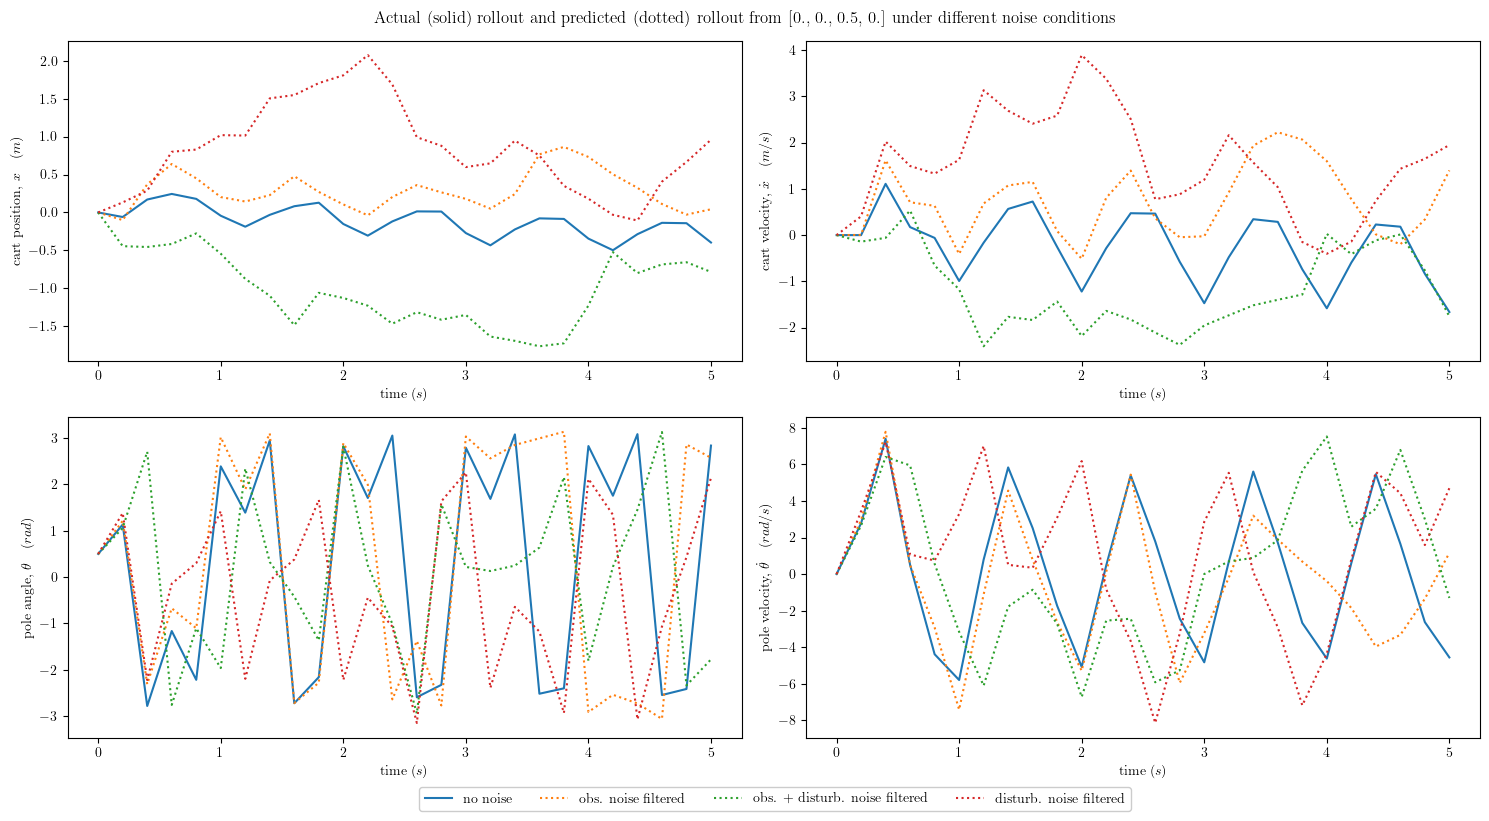

In [15]:
from shared import plot_rollout_single, plot_rollout

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(2, 2, figsize=(15, 8), layout='tight')

s0 = np.array([0, 0, 0.5, 0, 0])

x, y0 = m0f.simulate(time=5, state=s0, remap=True)

yhf = np.zeros((4, x.size, 4))
yhf[0] = y0

_, y1 = m1f.simulate(time=5, state=s0, remap=True)
_, y2 = m2f.simulate(time=5, state=s0, remap=True)
_, y3 = m3f.simulate(time=5, state=s0, remap=True)

yhf[1] = y1
yhf[2] = y2
yhf[3] = y3



plot_rollout(x, yhf[0], ax, fig, linestyle='solid', label='no noise')
plot_rollout(x, yhf[1], ax, fig, linestyle='dotted', label='obs. noise filtered')
plot_rollout(x, yhf[2], ax, fig, linestyle='dotted', label='obs. + disturb. noise filtered')
plot_rollout(x, yhf[3], ax, fig, linestyle='dotted', label='disturb. noise filtered')

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.5, 0.] under different noise conditions")


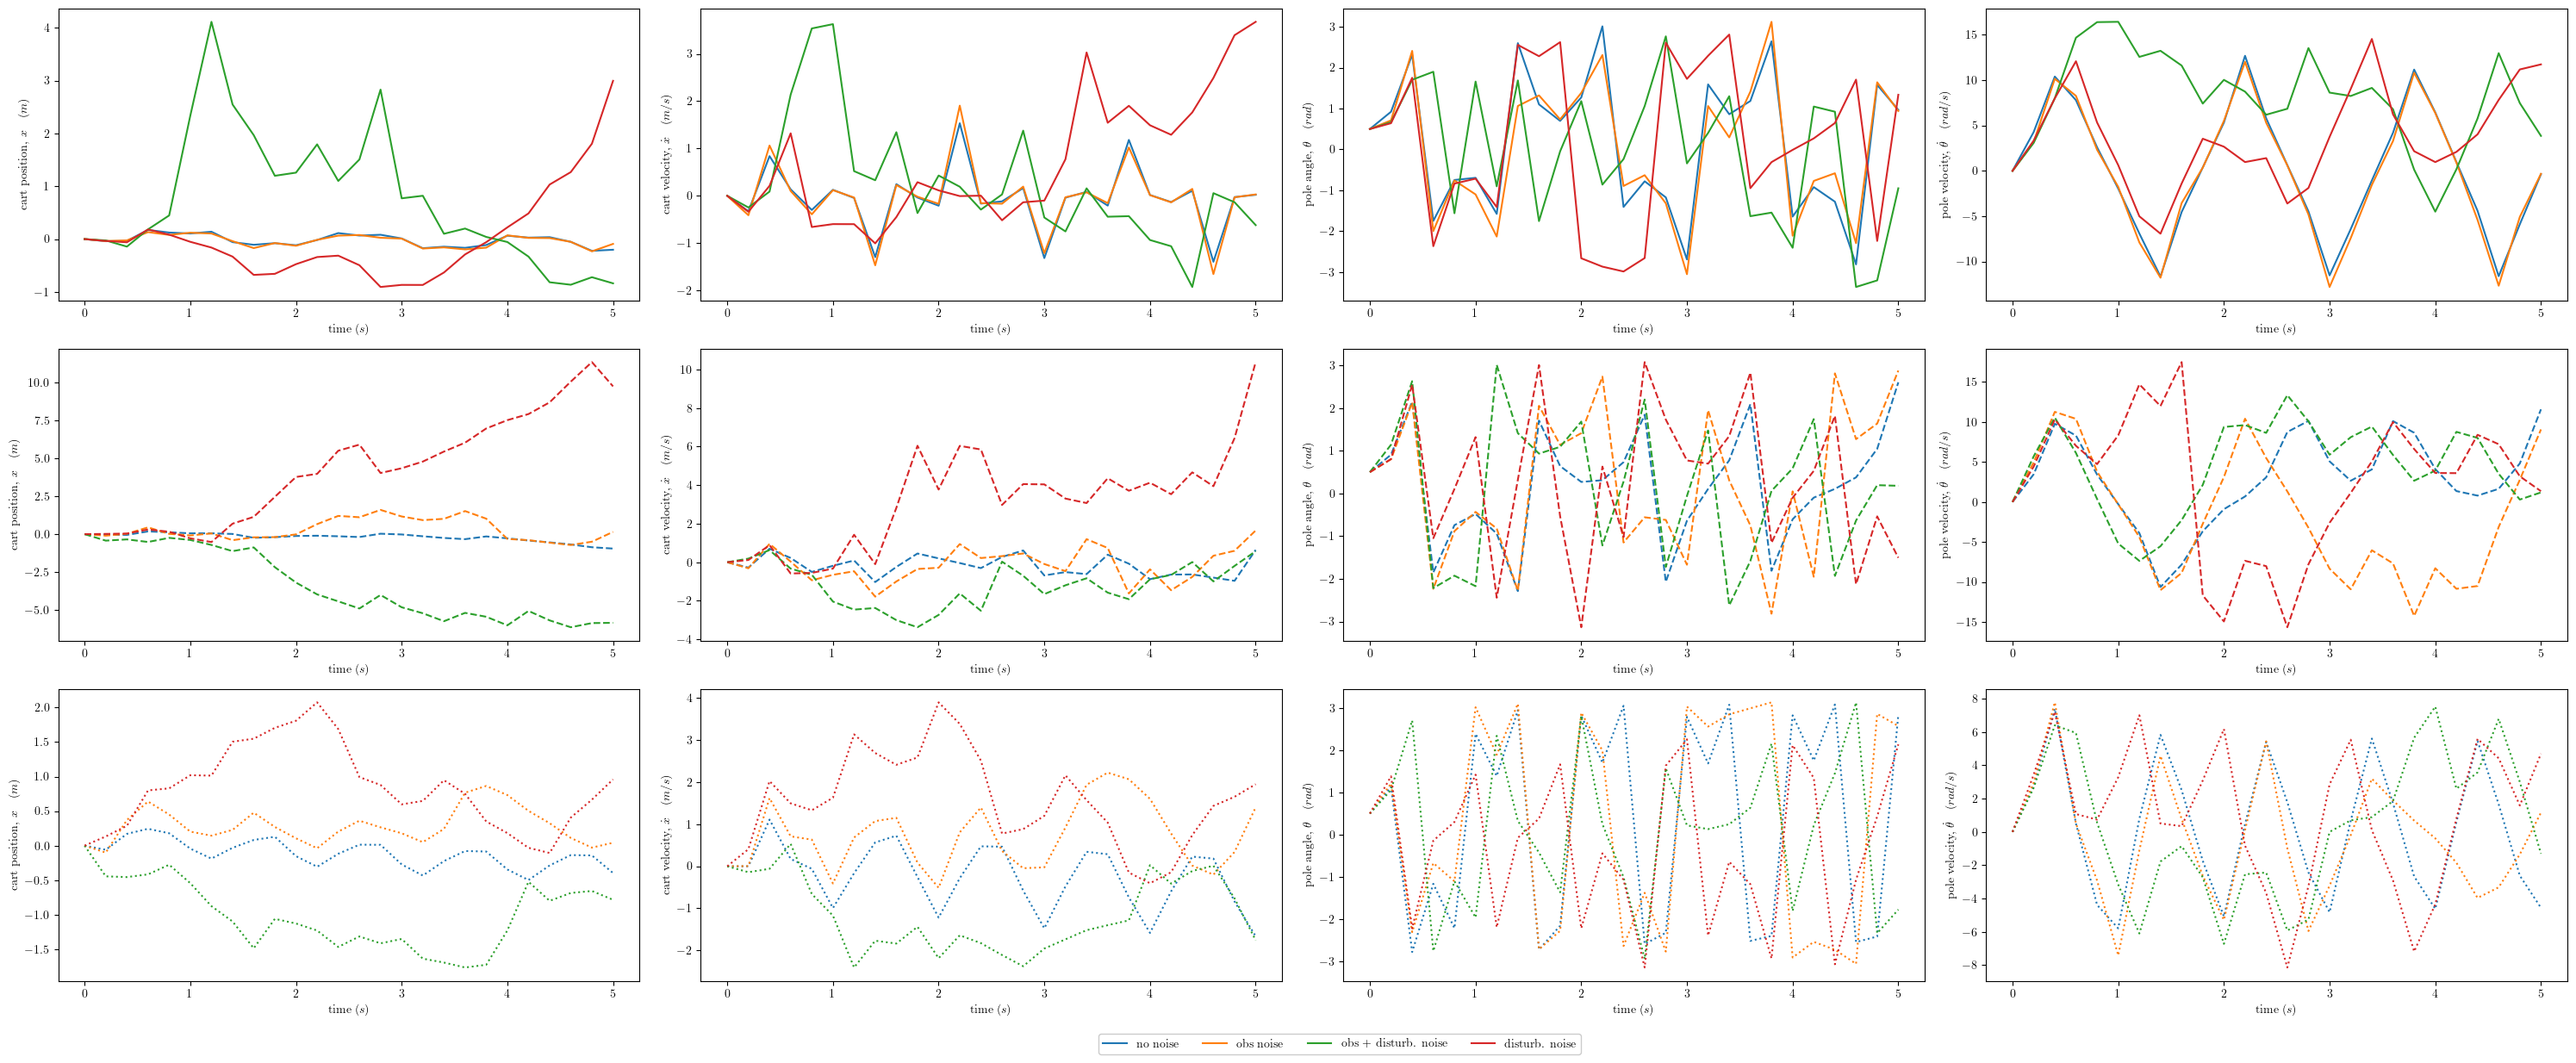

In [16]:
from shared import plot_rollout_merge

fig, ax_merge = plt.subplots(3, 4, figsize=(30, 12), layout='tight')


plot_rollout_merge(x, y[0], ax_merge[0], fig, linestyle='solid', label='no noise')
plot_rollout_merge(x, y[1], ax_merge[0], fig, linestyle='solid', label='obs noise')
plot_rollout_merge(x, y[2], ax_merge[0], fig, linestyle='solid', label='obs + disturb. noise')
plot_rollout_merge(x, y[3], ax_merge[0], fig, linestyle='solid', label='disturb. noise')

plot_rollout_merge(x, yh[0], ax_merge[1], fig, linestyle='dashed', )
plot_rollout_merge(x, yh[1], ax_merge[1], fig, linestyle='dashed', )
plot_rollout_merge(x, yh[2], ax_merge[1], fig, linestyle='dashed', )
plot_rollout_merge(x, yh[3], ax_merge[1], fig, linestyle='dashed', )

plot_rollout_merge(x, yhf[0], ax_merge[2], fig, linestyle='dotted',)
plot_rollout_merge(x, yhf[1], ax_merge[2], fig, linestyle='dotted',)
plot_rollout_merge(x, yhf[2], ax_merge[2], fig, linestyle='dotted',)
plot_rollout_merge(x, yhf[3], ax_merge[2], fig, linestyle='dotted',)


lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.03), ncol=4)

# fig.suptitle("Actual (top), model (middle) and filtered model (bottom) roll-out from [0., 0., 0.5, 0.] under different noise conditions")
